In [1]:
import dill

import math
import torch
import numpy as np
import matplotlib.pyplot as plt

from models.alexnet import *
from models.b_alexnet import *
from models.super_hbn_testing import *
from models.td_hbn_testing import *

from utils.load_data import *
from utils.analyse import *

from tqdm import tqdm
%matplotlib inline

# import experiment results from prep file
dill.load_session('results/experiment_results.db')
device = torch.device('cuda')

C:\Users\benja\anaconda3\envs\drlnd\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Experimentation Results 
#### AlexNet Data
A dictionary containing results corresponding to measured metrics to be used for analysis.

In [2]:
AlexNet_results

{'test_accuracy': [48.71],
 'hierarchical_accuracy': [61.95],
 'specificity': [1.0],
 'flops': [96452608.0],
 'memory': [33.39561367034912],
 'time_taken': [18.2937542],
 'branch1_exits': [0],
 'branch2_exits': [0],
 'branch3_exits': [0],
 'fine_exits': [20],
 'coarse_exits': [0]}

#### B-AlexNet Data
3 sets of experiments for this model. Each experiment returns metrics stored in a dictionary. The experiments are as follows:
- B-AlexNet with all outputs in branch 1
- B-AlexNet with all outputs in branch 2
- B-AlexNet with all outputs in branch 3

In [3]:
BranchyAlexNet_results_branch1

{'test_accuracy': [51.43],
 'hierarchical_accuracy': [63.94],
 'specificity': [1.0],
 'flops': [31703040.0],
 'memory': [46.04724597930908],
 'time_taken': [14.828854799999998],
 'branch1_exits': [20],
 'branch2_exits': [0],
 'branch3_exits': [0],
 'fine_exits': [20],
 'coarse_exits': [0]}

In [4]:
BranchyAlexNet_results_branch2

{'test_accuracy': [53.03],
 'hierarchical_accuracy': [65.68],
 'specificity': [1.0],
 'flops': [75628544.0],
 'memory': [46.04724597930908],
 'time_taken': [15.2168378],
 'branch1_exits': [0],
 'branch2_exits': [20],
 'branch3_exits': [0],
 'fine_exits': [20],
 'coarse_exits': [0]}

In [5]:
BranchyAlexNet_results_branch3

{'test_accuracy': [51.24],
 'hierarchical_accuracy': [63.95],
 'specificity': [1.0],
 'flops': [135806976.0],
 'memory': [46.04724597930908],
 'time_taken': [16.749331199999993],
 'branch1_exits': [0],
 'branch2_exits': [0],
 'branch3_exits': [20],
 'fine_exits': [20],
 'coarse_exits': [0]}

#### Sem-HBN Data
3 sets of experiments for this model. Each experiment returns metrics stored in a dictionary. The experiments are as follows:
- Sem-HBN with all outputs in branch 1
- Sem-HBN with all outputs in branch 2
- Sem-HBN with all outputs in branch 3

In [6]:
Sem_HBN_results_branch1

{'test_accuracy': [64.59],
 'hierarchical_accuracy': [64.59],
 'specificity': [0.0],
 'flops': [31375360.0],
 'memory': [44.79663562774658],
 'time_taken': [14.2615287],
 'branch1_exits': [20],
 'branch2_exits': [0],
 'branch3_exits': [0],
 'fine_exits': [0],
 'coarse_exits': [20]}

In [7]:
Sem_HBN_results_branch2

{'test_accuracy': [65.92],
 'hierarchical_accuracy': [65.92],
 'specificity': [0.0],
 'flops': [74973184.0],
 'memory': [44.79663562774658],
 'time_taken': [15.078986900000004],
 'branch1_exits': [0],
 'branch2_exits': [20],
 'branch3_exits': [0],
 'fine_exits': [0],
 'coarse_exits': [20]}

In [8]:
Sem_HBN_results_branch3

{'test_accuracy': [51.43],
 'hierarchical_accuracy': [65.55],
 'specificity': [1.0],
 'flops': [135151616.0],
 'memory': [44.79663562774658],
 'time_taken': [16.8666762],
 'branch1_exits': [0],
 'branch2_exits': [0],
 'branch3_exits': [20],
 'fine_exits': [20],
 'coarse_exits': [0]}

#### Gran-HBN Data
3 sets of experiments for this model. Each experiment returns metrics stored in a dictionary. The experiments are as follows:
- Gran-HBN with all outputs in branch 1
- Gran-HBN with all outputs in branch 2
- Gran-HBN with all outputs in branch 3

In [9]:
GranHBN_results_branch1 = SuperHBN_results_branch1
GranHBN_results_branch1

{'test_accuracy': [64.51,
  64.27,
  63.92,
  64.04,
  63.73,
  64.02,
  63.76,
  63.93,
  64.52,
  64.07,
  64.21,
  64.21,
  63.97,
  63.59,
  63.63,
  63.92,
  64.43,
  64.16,
  64.25,
  64.26,
  64.1,
  63.73,
  63.55,
  63.74,
  61.86,
  58.07,
  54.83,
  51.79,
  51.44,
  52.05,
  51.62,
  52.12,
  52.07,
  52.07,
  52.16,
  52.4,
  51.77,
  51.84,
  52.01,
  51.89,
  52.1,
  51.71,
  52.0,
  51.69,
  51.72,
  52.04,
  51.73,
  51.86,
  52.15,
  51.67],
 'hierarchical_accuracy': [64.51,
  64.27,
  63.92,
  64.04,
  63.73,
  64.02,
  63.76,
  63.93,
  64.52,
  64.07,
  64.21,
  64.21,
  63.97,
  63.59,
  63.63,
  63.92,
  64.43,
  64.16,
  64.25,
  64.26,
  64.1,
  63.73,
  63.55,
  63.74,
  63.74,
  64.44,
  64.9,
  64.19,
  64.63,
  64.88,
  64.15,
  64.88,
  64.63,
  64.84,
  64.99,
  64.93,
  65.02,
  64.77,
  65.21,
  64.62,
  65.15,
  64.71,
  64.75,
  64.83,
  64.6,
  65.05,
  64.85,
  64.69,
  64.96,
  64.6],
 'specificity': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


In [10]:
GranHBN_results_branch2 = SuperHBN_results_branch2
GranHBN_results_branch2

{'test_accuracy': [66.59,
  66.64,
  66.61,
  66.92,
  66.73,
  66.11,
  66.49,
  67.04,
  66.31,
  67.1,
  66.81,
  66.81,
  66.8,
  66.58,
  66.56,
  66.68,
  66.61,
  66.42,
  66.33,
  66.99,
  66.79,
  66.88,
  67.29,
  66.48,
  66.77,
  66.96,
  65.97,
  64.73,
  64.07,
  56.31,
  54.95,
  53.93,
  54.56,
  53.74,
  53.96,
  53.94,
  54.11,
  53.66,
  53.75,
  53.48,
  53.89,
  54.07,
  53.61,
  53.8,
  53.74,
  53.82,
  53.62,
  53.7,
  53.15,
  53.31],
 'hierarchical_accuracy': [66.59,
  66.64,
  66.61,
  66.92,
  66.73,
  66.11,
  66.49,
  67.04,
  66.31,
  67.1,
  66.81,
  66.81,
  66.8,
  66.58,
  66.56,
  66.68,
  66.61,
  66.42,
  66.33,
  66.99,
  66.79,
  66.88,
  67.29,
  66.48,
  66.77,
  66.96,
  66.6,
  66.52,
  67.58,
  66.74,
  66.71,
  67.01,
  67.4,
  67.1,
  67.06,
  67.18,
  67.31,
  67.17,
  67.02,
  66.22,
  66.89,
  67.47,
  66.42,
  67.05,
  67.07,
  67.34,
  66.7,
  66.86,
  66.45,
  66.73],
 'specificity': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  

In [11]:
GranHBN_results_branch3 = SuperHBN_results_branch3
GranHBN_results_branch3

{'test_accuracy': [65.08,
  65.35,
  65.99,
  65.27,
  65.68,
  65.19,
  64.95,
  65.48,
  65.71,
  65.67,
  65.02,
  64.8,
  65.31,
  65.42,
  65.44,
  65.45,
  65.37,
  65.05,
  65.89,
  65.24,
  64.98,
  65.0,
  63.93,
  62.27,
  57.99,
  55.79,
  51.79,
  51.86,
  51.68,
  51.91,
  52.18,
  51.76,
  52.07,
  51.8,
  51.91,
  51.66,
  51.95,
  51.42,
  51.48,
  51.88,
  51.53,
  51.26,
  51.66,
  52.07,
  51.88,
  51.54,
  51.53,
  51.44,
  51.56,
  51.15],
 'hierarchical_accuracy': [65.08,
  65.35,
  65.99,
  65.27,
  65.68,
  65.19,
  64.95,
  65.48,
  65.71,
  65.67,
  65.02,
  64.8,
  65.31,
  65.42,
  65.44,
  65.45,
  65.37,
  65.05,
  65.89,
  65.24,
  64.98,
  65.0,
  65.31,
  65.34,
  65.41,
  65.89,
  64.7,
  65.66,
  65.15,
  65.26,
  65.64,
  65.25,
  65.33,
  65.28,
  65.33,
  65.21,
  65.17,
  64.97,
  65.45,
  65.18,
  65.05,
  64.63,
  65.37,
  65.34,
  65.34,
  64.79,
  65.36,
  64.95,
  65.2,
  64.65],
 'specificity': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

#### AG-HBN Data
3 sets of experiments for this model. Each experiment returns metrics stored in a dictionary. The experiments are as follows:
- AG-HBN with all outputs in branch 1
- AG-HBN with all outputs in branch 2
- AG-HBN with all outputs in branch 3

In [12]:
AG_HBN_results_branch1 = TD_HBN_results_branch1
AG_HBN_results_branch1

{'test_accuracy': [54.87],
 'hierarchical_accuracy': [64.48],
 'specificity': [0.7486],
 'flops': [31793152.0],
 'memory': [46.53574848175049],
 'time_taken': [148.77754149999998],
 'branch1_exits': [10000],
 'branch2_exits': [0],
 'branch3_exits': [0],
 'fine_exits': [7486],
 'coarse_exits': [2514]}

In [13]:
AG_HBN_results_branch2 = TD_HBN_results_branch2
AG_HBN_results_branch2

{'test_accuracy': [55.78],
 'hierarchical_accuracy': [66.37],
 'specificity': [0.7478],
 'flops': [75800576.0],
 'memory': [46.53574848175049],
 'time_taken': [235.7382174],
 'branch1_exits': [0],
 'branch2_exits': [10000],
 'branch3_exits': [0],
 'fine_exits': [7478],
 'coarse_exits': [2522]}

In [14]:
AG_HBN_results_branch3 = TD_HBN_results_branch3
AG_HBN_results_branch3

{'test_accuracy': [53.91],
 'hierarchical_accuracy': [64.8],
 'specificity': [0.7474],
 'flops': [136060928.0],
 'memory': [46.53574848175049],
 'time_taken': [340.807956],
 'branch1_exits': [0],
 'branch2_exits': [0],
 'branch3_exits': [10000],
 'fine_exits': [7474],
 'coarse_exits': [2526]}

## Plots
### Accuracy-Specificity Relationship wrt Fine-Tolerance for Each Branch
##### Branch 1 Accuracy-Specificity Relationship

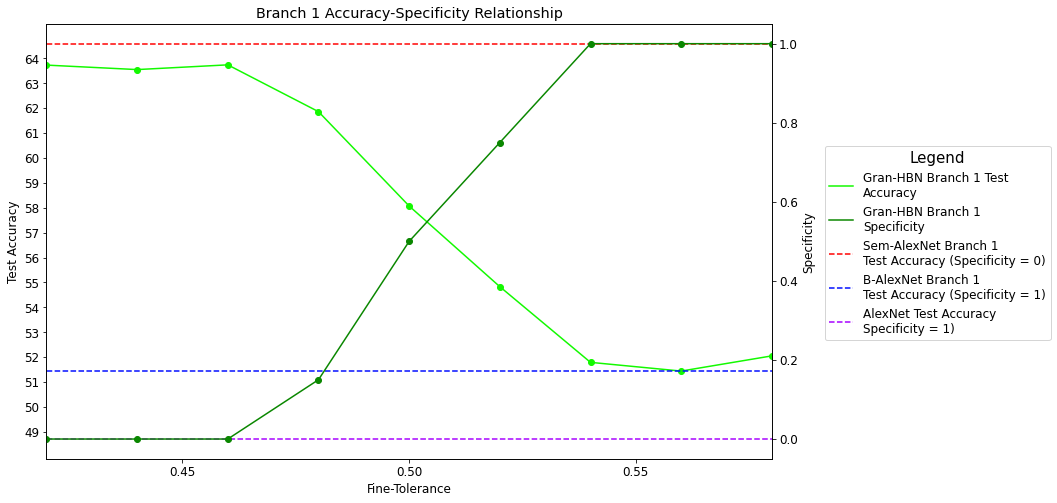

In [28]:
x_ax_fine_tolerance = np.arange(0.4, 0.95, 0.01)
fig, axes = plt.subplots(figsize=(13, 8), nrows=1, ncols=1)

# test accuracy plot
plot1 = axes.plot(fine_tolerance, GranHBN_results_branch1['test_accuracy'], c="#13F900", label="Gran-HBN Branch 1 Test\nAccuracy")
axes.scatter(fine_tolerance, GranHBN_results_branch1['test_accuracy'], c="#13F900")

# specificity plot
axes1 = axes.twinx()
plot2 = axes1.plot(fine_tolerance, GranHBN_results_branch1['specificity'], c="#0A8700", label="Gran-HBN Branch 1\nSpecificity")
axes1.scatter(fine_tolerance, GranHBN_results_branch1['specificity'], c="#0A8700")

# plot comparisons
plot3 = axes.plot(fine_tolerance, [Sem_HBN_results_branch1['test_accuracy']] * len(fine_tolerance), c="#FF0000", linestyle='dashed', label="Sem-AlexNet Branch 1\nTest Accuracy (Specificity = 0)")
plot4 = axes.plot(fine_tolerance, [BranchyAlexNet_results_branch1['test_accuracy']] * len(fine_tolerance), c="#000CFF", linestyle='dashed', label="B-AlexNet Branch 1\nTest Accuracy (Specificity = 1)")
plot5 = axes.plot(fine_tolerance, [AlexNet_results['test_accuracy']] * len(fine_tolerance), c="#A600FF", linestyle='dashed', label="AlexNet Test Accuracy\nSpecificity = 1)")

# plot config
axes.title.set_text("Branch 1 Accuracy-Specificity Relationship")
axes.set_xlabel("Fine-Tolerance")
axes.set_ylabel("Test Accuracy")
axes1.set_ylabel("Specificity")
axes.set_xticks(np.arange(0.3, 1.1, 0.05))
axes.set_yticks(np.arange(49, 65, 1))
axes.set_xlim(0.42, 0.58)

plts = plot1 + plot2 + plot3 + plot4 + plot5
labels = [p.get_label() for p in plts]
fig.legend(plts, labels, title='Legend',title_fontsize=15,loc='center left', bbox_to_anchor=(0.95, 0.5))

plt.show()

From the graph, it is clear that the operating region (where the variations in $\text{Specificity}$ occur) for the fine-tolerance is between 0.54 and 0.76. A marginal accuracy improvement (+0.37%) is observed for this branch at a specificity of 1 when comparing Super-HBN to Sem-HBN. It is clear, that the fine-tolerance hyper-parameter provides the ability to vary the classification granularity at branch 1 during inference.
##### Branch 2 Accuracy-Specificity Relationship

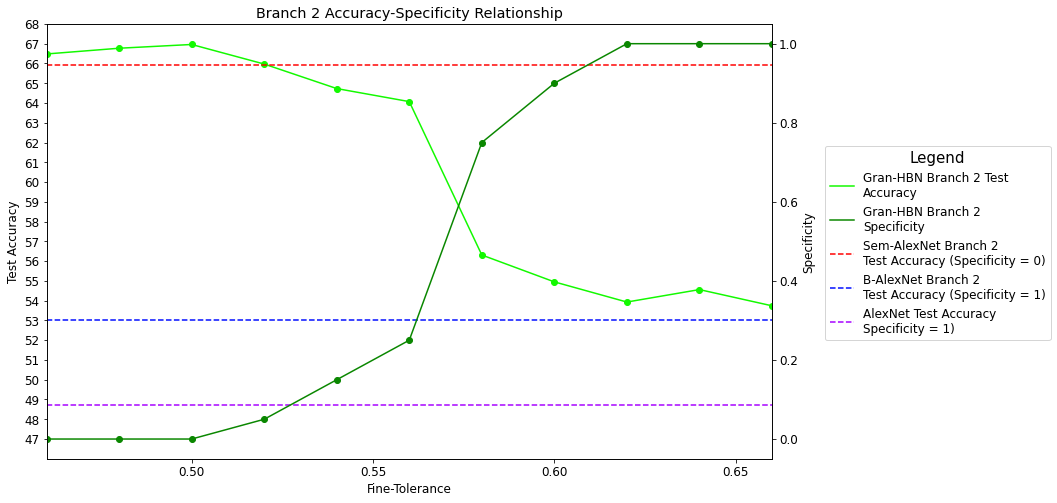

In [29]:
x_ax_fine_tolerance = np.arange(0.4, 0.95, 0.01)
fig, axes = plt.subplots(figsize=(13, 8), nrows=1, ncols=1)

# test accuracy plot
plot1 = axes.plot(fine_tolerance, GranHBN_results_branch2['test_accuracy'], c="#13F900", label="Gran-HBN Branch 2 Test\nAccuracy")
axes.scatter(fine_tolerance, GranHBN_results_branch2['test_accuracy'], c="#13F900")

# specificity plot
axes1 = axes.twinx()
plot2 = axes1.plot(fine_tolerance, GranHBN_results_branch2['specificity'], c="#0A8700", label="Gran-HBN Branch 2\nSpecificity")
axes1.scatter(fine_tolerance, GranHBN_results_branch2['specificity'], c="#0A8700")

# plot comparisons
plot3 = axes.plot(fine_tolerance, [Sem_HBN_results_branch2['test_accuracy']] * len(fine_tolerance), c="#FF0000", linestyle='dashed', label="Sem-AlexNet Branch 2\nTest Accuracy (Specificity = 0)")
plot4 = axes.plot(fine_tolerance, [BranchyAlexNet_results_branch2['test_accuracy']] * len(fine_tolerance), c="#000CFF", linestyle='dashed', label="B-AlexNet Branch 2\nTest Accuracy (Specificity = 1)")
plot5 = axes.plot(fine_tolerance, [AlexNet_results['test_accuracy']] * len(fine_tolerance), c="#A600FF", linestyle='dashed', label="AlexNet Test Accuracy\nSpecificity = 1)")

# plot config
axes.title.set_text("Branch 2 Accuracy-Specificity Relationship")
axes.set_xlabel("Fine-Tolerance")
axes.set_ylabel("Test Accuracy")
axes1.set_ylabel("Specificity")
axes.set_xticks(np.arange(0.3, 1.1, 0.05))
axes.set_yticks(np.arange(47, 69, 1))
axes.set_xlim(0.46, 0.66)
axes.set_ylim(46, 68)

plts = plot1 + plot2 + plot3 + plot4 + plot5
labels = [p.get_label() for p in plts]
fig.legend(plts, labels, title='Legend',title_fontsize=15,loc='center left', bbox_to_anchor=(0.95, 0.5))

plt.show()

From the graph, it is clear that the operating region for the fine-tolerance is between 0.54 and 0.78. An accuracy loss (-0.78%) is observed for this branch at a specificity of 1 when comparing Super-HBN to Sem-HBN. This may be a result of the increased model generality due to the potential for classifying a wider range of class granularities at each branch recursion point. Another potential reason is the fact that the branch location for branch 2 is **potentially** not ideal (reasoning given in 'FLOPs-Accuracy Relationship wrt Fine-Tolerance for Each Branch' section).
##### Branch 3 Accuracy-Specificity Relationship

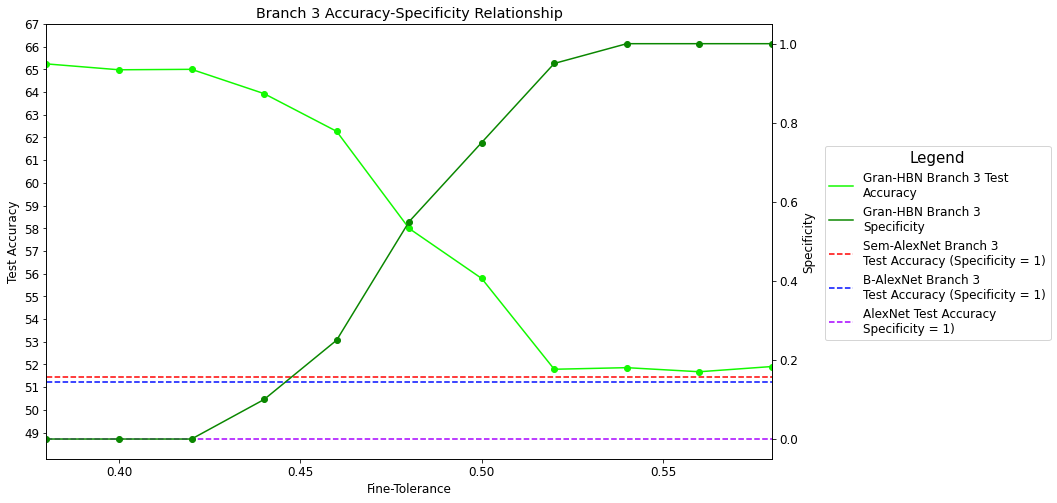

In [30]:
x_ax_fine_tolerance = np.arange(0.4, 0.95, 0.01)
fig, axes = plt.subplots(figsize=(13, 8), nrows=1, ncols=1)

# test accuracy plot
plot1 = axes.plot(fine_tolerance, GranHBN_results_branch3['test_accuracy'], c="#13F900", label="Gran-HBN Branch 3 Test\nAccuracy")
axes.scatter(fine_tolerance, GranHBN_results_branch3['test_accuracy'], c="#13F900")

# specificity plot
axes1 = axes.twinx()
plot2 = axes1.plot(fine_tolerance, GranHBN_results_branch3['specificity'], c="#0A8700", label="Gran-HBN Branch 3\nSpecificity")
axes1.scatter(fine_tolerance, GranHBN_results_branch3['specificity'], c="#0A8700")

# plot comparisons
plot3 = axes.plot(fine_tolerance, [Sem_HBN_results_branch3['test_accuracy']] * len(fine_tolerance), c="#FF0000", linestyle='dashed', label="Sem-AlexNet Branch 3\nTest Accuracy (Specificity = 1)")
plot4 = axes.plot(fine_tolerance, [BranchyAlexNet_results_branch3['test_accuracy']] * len(fine_tolerance), c="#000CFF", linestyle='dashed', label="B-AlexNet Branch 3\nTest Accuracy (Specificity = 1)")
plot5 = axes.plot(fine_tolerance, [AlexNet_results['test_accuracy']] * len(fine_tolerance), c="#A600FF", linestyle='dashed', label="AlexNet Test Accuracy\nSpecificity = 1)")

# plot config
axes.title.set_text("Branch 3 Accuracy-Specificity Relationship")
axes.set_xlabel("Fine-Tolerance")
axes.set_ylabel("Test Accuracy")
axes1.set_ylabel("Specificity")
axes.set_xticks(np.arange(0.15, 1.1, 0.05))
axes.set_yticks(np.arange(49, 68, 1))
axes.set_xlim(0.38, 0.58)

plts = plot1 + plot2 + plot3 + plot4 + plot5
labels = [p.get_label() for p in plts]
fig.legend(plts, labels, title='Legend',title_fontsize=15,loc='center left', bbox_to_anchor=(0.95, 0.5))

plt.show()

From the graph, it is clear that the operating region for the fine-tolerance is between 0.51 and 0.64. This is a shift to the left compared to prior branches, indicating the difference in uncertainty between the fine and coarse classes has reduced at the latest branch. This is likely due to the models ability to extract more complex features at deeper layers in the CNN. An marginal accuracy reduction (-0.25%) is observed for this branch at a specificity of 0 when comparing Super-HBN to Sem-HBN.

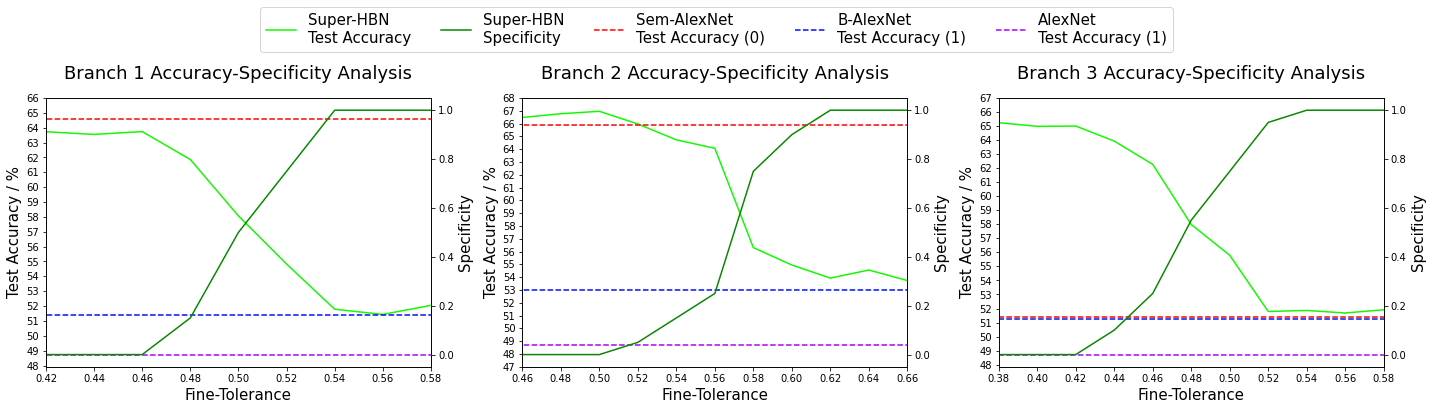

In [33]:
fig, axes = plt.subplots(figsize=(20, 5), nrows=1, ncols=3)

# test accuracy plot 1
plot1a = axes[0].plot(fine_tolerance, GranHBN_results_branch1['test_accuracy'], c="#13F900", label="Super-HBN\nTest Accuracy")

# specificity plot 1
axes1a = axes[0].twinx()
plot2a = axes1a.plot(fine_tolerance, GranHBN_results_branch1['specificity'], c="#0A8700", label="Super-HBN\nSpecificity")

# plot 1 comparisons
plot3a = axes[0].plot(fine_tolerance, [Sem_HBN_results_branch1['test_accuracy']] * len(fine_tolerance), c="#FF0000", linestyle='dashed', label="Sem-AlexNet\nTest Accuracy (0)")
plot4a = axes[0].plot(fine_tolerance, [BranchyAlexNet_results_branch1['test_accuracy']] * len(fine_tolerance), c="#000CFF", linestyle='dashed', label="B-AlexNet\nTest Accuracy (1)")
plot5a = axes[0].plot(fine_tolerance, [AlexNet_results['test_accuracy']] * len(fine_tolerance), c="#A600FF", linestyle='dashed', label="AlexNet\nTest Accuracy (1)")

# test accuracy plot 2
plot1b = axes[1].plot(fine_tolerance, GranHBN_results_branch2['test_accuracy'], c="#13F900", label="Super-HBN Branch 1 Test\nAccuracy")

# specificity plot 2
axes1b = axes[1].twinx()
plot2b = axes1b.plot(fine_tolerance, GranHBN_results_branch2['specificity'], c="#0A8700", label="Super-HBN Branch 1\nSpecificity")

# plot 2 comparisons
plot3b = axes[1].plot(fine_tolerance, [Sem_HBN_results_branch2['test_accuracy']] * len(fine_tolerance), c="#FF0000", linestyle='dashed', label="Sem-AlexNet Branch 2\nTest Accuracy (Specificity = 0)")
plot4b = axes[1].plot(fine_tolerance, [BranchyAlexNet_results_branch2['test_accuracy']] * len(fine_tolerance), c="#000CFF", linestyle='dashed', label="B-AlexNet Branch 2\nTest Accuracy (Specificity = 1)")
plot5b = axes[1].plot(fine_tolerance, [AlexNet_results['test_accuracy']] * len(fine_tolerance), c="#A600FF", linestyle='dashed', label="AlexNet Test Accuracy\nSpecificity = 1)")

# test accuracy plot 3
plot1c = axes[2].plot(fine_tolerance, GranHBN_results_branch3['test_accuracy'], c="#13F900", label="Super-HBN Branch 1 Test\nAccuracy")

# specificity plot 3
axes1c = axes[2].twinx()
plot2c = axes1c.plot(fine_tolerance, GranHBN_results_branch3['specificity'], c="#0A8700", label="Super-HBN Branch 1\nSpecificity")

# plot 3 comparisons
plot3c = axes[2].plot(fine_tolerance, [Sem_HBN_results_branch3['test_accuracy']] * len(fine_tolerance), c="#FF0000", linestyle='dashed', label="Sem-AlexNet Branch 3\nTest Accuracy (Specificity = 0)")
plot4c = axes[2].plot(fine_tolerance, [BranchyAlexNet_results_branch3['test_accuracy']] * len(fine_tolerance), c="#000CFF", linestyle='dashed', label="B-AlexNet Branch 3\nTest Accuracy (Specificity = 1)")
plot5c = axes[2].plot(fine_tolerance, [AlexNet_results['test_accuracy']] * len(fine_tolerance), c="#A600FF", linestyle='dashed', label="AlexNet Test Accuracy\nSpecificity = 1)")

# plot 1 config
axes[0].set_title("Branch 1 Accuracy-Specificity Analysis", y=1.05, fontsize=18)
axes[0].set_xlabel("Fine-Tolerance", fontsize=15)
axes[0].set_ylabel("Test Accuracy / %", fontsize=15)
axes1a.set_ylabel("Specificity", fontsize=15)
axes[0].set_xticks(np.arange(0.2, 1.1, 0.02))
axes[0].set_yticks(np.arange(48, 67, 1))
axes[0].set_xlim(0.42, 0.58)
axes[0].tick_params(axis='both', which='major')
axes1a.tick_params(axis='both', which='major')

# plot 2 config
axes[1].set_title("Branch 2 Accuracy-Specificity Analysis", y=1.05, fontsize=18)
axes[1].set_xlabel("Fine-Tolerance", fontsize=15)
axes[1].set_ylabel("Test Accuracy / %", fontsize=15)
axes1b.set_ylabel("Specificity", fontsize=15)
axes[1].set_xticks(np.arange(0.16, 1.1, 0.02))
axes[1].set_yticks(np.arange(47, 69, 1))
axes[1].set_xlim(0.46, 0.66)
axes[1].set_ylim(47, 68)

# plot 3 config
axes[2].set_title("Branch 3 Accuracy-Specificity Analysis", y=1.05, fontsize=18)
axes[2].set_xlabel("Fine-Tolerance", fontsize=15)
axes[2].set_ylabel("Test Accuracy / %", fontsize=15)
axes1c.set_ylabel("Specificity", fontsize=15)
axes[2].set_xticks(np.arange(0.26, 1.1, 0.02))
axes[2].set_yticks(np.arange(48, 68, 1))
axes[2].set_xlim(0.38, 0.58)

plt.rc('font', size=10)

plts = plot1a + plot2a + plot3a + plot4a + plot5a
labels = [p.get_label() for p in plts]
fig.legend(plts, labels, title_fontsize=12, fontsize=15, loc='upper center', ncol=len(plts), bbox_to_anchor=(0.5, 1.15))

fig.tight_layout()
plt.show()

## Accuracy-Specificity Comparison Plot

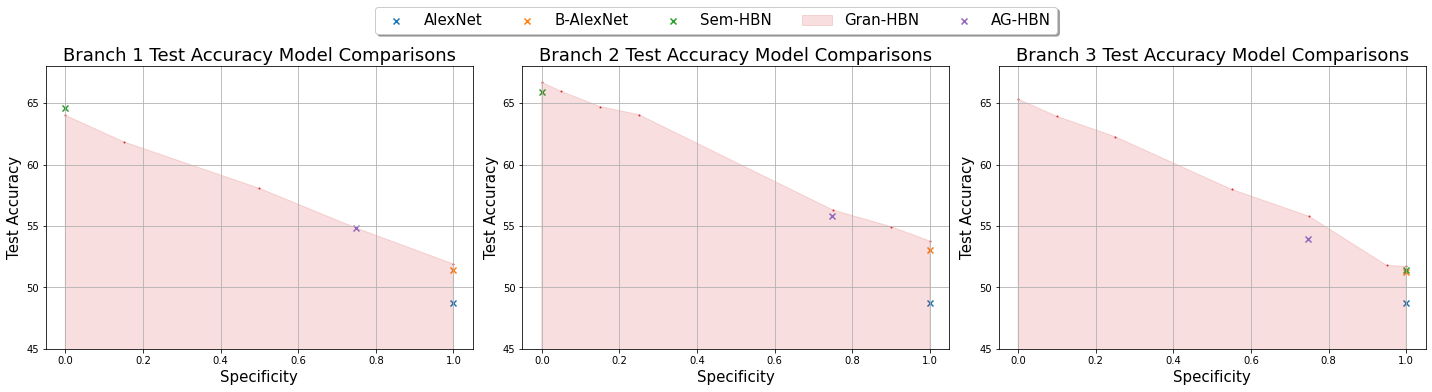

In [19]:
import matplotlib.pyplot as plt
import torch

# List of dictionaries
branch1 = {'AlexNet': AlexNet_results, 'B-AlexNet': BranchyAlexNet_results_branch1, 'Sem-HBN': Sem_HBN_results_branch1, 'Gran-HBN': GranHBN_results_branch1, 'AG-HBN': AG_HBN_results_branch1}
branch2 = {'AlexNet': AlexNet_results, 'B-AlexNet': BranchyAlexNet_results_branch2, 'Sem-HBN': Sem_HBN_results_branch2, 'Gran-HBN': GranHBN_results_branch2, 'AG-HBN': AG_HBN_results_branch2}
branch3 = {'AlexNet': AlexNet_results, 'B-AlexNet': BranchyAlexNet_results_branch3, 'Sem-HBN': Sem_HBN_results_branch3, 'Gran-HBN': GranHBN_results_branch3, 'AG-HBN': AG_HBN_results_branch3}

# Function to create a subplot
def create_subplot(ax, all_dicts, plot_title, return_handles_labels=False):
    handles, labels = [], []
    
    for name, data_dict in all_dicts.items():
        if name == 'Gran-HBN':
            specificity_list = data_dict['specificity']
            accuracy_list = data_dict['test_accuracy']

            # Calculate mean accuracy for each specificity
            mean_accuracy_dict = {}
            count_dict = {}

            for spec, acc in zip(specificity_list, accuracy_list):
                if spec not in mean_accuracy_dict:
                    mean_accuracy_dict[spec] = acc
                    count_dict[spec] = 1
                else:
                    mean_accuracy_dict[spec] += acc
                    count_dict[spec] += 1

            processed_specificity_values = list(mean_accuracy_dict.keys())
            processed_accuracy_values = [mean_accuracy_dict[spec] / count_dict[spec] for spec in processed_specificity_values]

            scatter = ax.scatter(processed_specificity_values, processed_accuracy_values, s=1)
            ax.fill_between(processed_specificity_values, 0, processed_accuracy_values, color=scatter.get_facecolor(), alpha=0.15, label=name)
        else:
            scatter = ax.scatter(data_dict['specificity'], data_dict['test_accuracy'], marker='x', label=name)

        handles, labels = ax.get_legend_handles_labels()

    ax.set_xlabel('Specificity', fontsize=15)
    ax.set_ylabel('Test Accuracy', fontsize=15)
    ax.set_ylim(45, 68)
    ax.set_xlim(-0.05, 1.05)
    ax.set_title(plot_title, fontsize=18)
    ax.grid(True)
    
    if return_handles_labels:
        return handles, labels

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot 1 (keep track of legend handles and labels)
handles, labels = create_subplot(axs[0], branch1, 'Branch 1 Test Accuracy Model Comparisons', return_handles_labels=True)

# Plot 2
create_subplot(axs[1], branch2, 'Branch 2 Test Accuracy Model Comparisons')

# Plot 3
create_subplot(axs[2], branch3, 'Branch 3 Test Accuracy Model Comparisons')

# Create a common legend outside the subplots using handles and labels from the first plot
fig.legend(handles, labels, loc='upper center', fontsize=15, bbox_to_anchor=(0.5, 1.1), ncol=len(branch1), fancybox=True, shadow=True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## FLOPs-Accuracy Relationship wrt Fine-Tolerance for Each Branch

C:\Users\benja\anaconda3\envs\drlnd\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


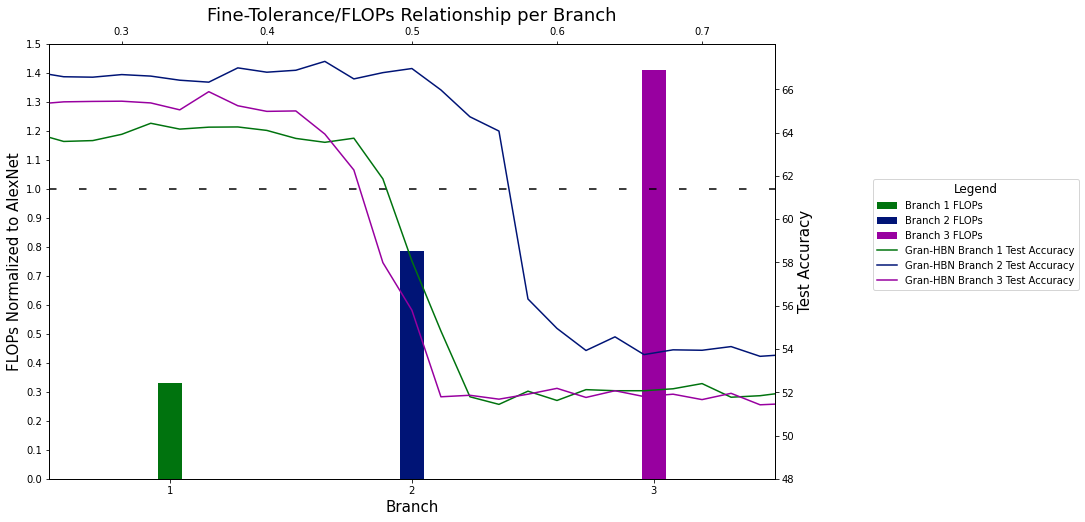

In [20]:
# Define a dictionary that maps branch labels to colours
branch_colours = {'1': '#00730E', '2': '#001476', '3': '#9800A0'}

fig, axes = plt.subplots(figsize=(13, 8), nrows=1, ncols=1)

# FLOPs as bars
bar_width = 0.1
branches = ['1', '2', '3']  # Define branch labels
index = np.arange(len(fine_tolerance))  # Use branches as the x-axis
gran_hbn_flops = [GranHBN_results_branch1['flops'][0] / AlexNet_results['flops'][0],
                  GranHBN_results_branch2['flops'][0] / AlexNet_results['flops'][0],
                  GranHBN_results_branch3['flops'][0] / AlexNet_results['flops'][0]]

# AlexNet FLOPs plot
AlexNet_FLOP = [1 for a in range(len(fine_tolerance))]
axes.plot([a-0.5 for a in range(len(fine_tolerance))], AlexNet_FLOP, c="#000000", linestyle='--', dashes=(5, 15), label="AlexNet FLOPs")

# # Set the color of the bars based on the branch label
# bar_colours = [branch_colours[branch] for branch in branches]
# labels = ["Branch 1 FLOPs", "Branch 2 FLOPs", "Branch 3 FLOPs"]

# bar1 = axes.bar(branches, gran_hbn_flops, width=bar_width, label=labels, color=bar_colours)

# Set the color of the bars based on the branch label
bar_colours = [branch_colours[branch] for branch in branches]
labels = {"1": "Branch 1 FLOPs", "2": "Branch 2 FLOPs", "3": "Branch 3 FLOPs"}

# Plot bars with labels
bar_handles = []
for branch, colour in zip(branches, bar_colours):
    bar_handles.append(axes.bar(branch, gran_hbn_flops[branches.index(branch)], width=bar_width, color=colour, label=labels[branch]))

# test accuracy plots
ax = axes.twiny()
axes1 = ax.twinx()
plot2a = axes1.plot(fine_tolerance, GranHBN_results_branch1['test_accuracy'], c=branch_colours['1'], label="Gran-HBN Branch 1 Test Accuracy")
plot2b = axes1.plot(fine_tolerance, GranHBN_results_branch2['test_accuracy'], c=branch_colours['2'], label="Gran-HBN Branch 2 Test Accuracy")
plot2c = axes1.plot(fine_tolerance, GranHBN_results_branch3['test_accuracy'], c=branch_colours['3'], label="Gran-HBN Branch 3 Test Accuracy")

# Adjust labels for the x-axes
# axes.set_xticks(index)
axes.set_xticklabels(branches)
axes.set_xlabel("Branch", fontsize=15)
axes.set_ylabel("FLOPs Normalized to AlexNet", fontsize=15)
axes1.set_ylabel("Test Accuracy", fontsize=15)

# plot config
axes.set_title("Fine-Tolerance/FLOPs Relationship per Branch", fontsize=18)
axes.set_yticks(np.arange(0, 1.6, 0.1))
axes1.set_yticks(np.arange(48, 68, 2))
axes1.set_xlim(0.25, 0.75)
axes.set_xlim(-0.5, 2.5)  # Adjust the x-axis limits

plts = bar_handles + plot2a + plot2b + plot2c
labels = [p.get_label() for p in plts]
fig.legend(plts, labels, title='Legend', title_fontsize=12, fontsize=10, loc='center left', bbox_to_anchor=(1, 0.55))
plt.show()

### Using Confusion Matrices as Visual Tools for Hierarchical Representation
(Bilal et. al.) presents a model for using reordered confusion matrices and bounding boxes around hierarchical classes as a visual tool for observing hierarchical learning. Here, we use this tool to investigate hierarchical semantic data representations for the different branches of the model. An experiment is ran for the complete model output for each branch with the fine-tolerance value tuned such that all outputs are fine classifications.
<br /><br />
(A. Bilal, A. Jourabloo, M. Ye, X. Liu and L. Ren, "Do Convolutional Neural Networks Learn Class Hierarchy?," in IEEE Transactions on Visualization and Computer Graphics, vol. 24, no. 1, pp. 152-162, Jan. 2018, doi: 10.1109/TVCG.2017.2744683.)

In [21]:
os.chdir('MAKE')
train_data, test_data = dataset()
g0, g0_names, num_g0_classes = g0_classes(train_data=train_data)
g1, g1_names, num_g1_classes = g1_classes()
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False, num_workers=0)

In [22]:
from models.super_hbn_testing import *
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Rectangle
import seaborn as sns

def conf_matrix(branch, threshold):
    # instance gran-hbn model
    gran_hbn = SuperHBN_Testing().to(device)
    gran_hbn.load_state_dict(torch.load('../results/models/Super-HBN.pth', map_location=device))
    gran_hbn.eval()

    # order classes
    hierarchy_classes_vals = zip(g1, g0, g0_names)
    sorted_hierarchy = sorted(hierarchy_classes_vals)
    ordered_g1, ordered_fine_classes, ordered_fine_names = zip(*sorted_hierarchy)

    # get predictions
    y_truth = []
    y_pred = []
    with torch.no_grad():
        for index, (images, labels) in enumerate(test_loader):
            images = images.to(device)
            labels = labels.to(device)

            outputs, _, _, _, _ = gran_hbn(images, threshold=threshold, fine_tolerance=1e6)
            _, predictions = torch.max(outputs, dim=1)

            for i in range(len(labels)):
                y_truth.append(labels[i].cpu().item())
                y_pred.append(predictions[i].cpu().item())

    # order classifications in a hierarchical manner
    class_to_position = {cls: idx for idx, cls in enumerate(ordered_fine_classes)}
    y_truth_mapped = [class_to_position[cls] for cls in y_truth]
    y_pred_mapped = [class_to_position[cls] for cls in y_pred]

    # Create the confusion matrix
    cf_matrix = confusion_matrix(y_truth, y_pred)

    fig, ax = plt.subplots(figsize=(20,15))
    sns.heatmap(cf_matrix, fmt="d", xticklabels=ordered_fine_names, yticklabels=ordered_fine_names, cmap="mako")

    plt.title(f'Branch {branch} with all Fine Classifications', fontsize=20)
    plt.xlabel('Predicted Class', fontsize=15)
    plt.ylabel('Actual Class', fontsize=15)

    for square_position in range(0, 100, 5):
        ax.add_patch(Rectangle((square_position,square_position), 5, 5,
                            edgecolor='red',
                            facecolor='none',
                            lw=2))

    ## Display the visualization of the Confusion Matrix.
    plt.rc('font', size=12)
    plt.tight_layout()
    plt.show()

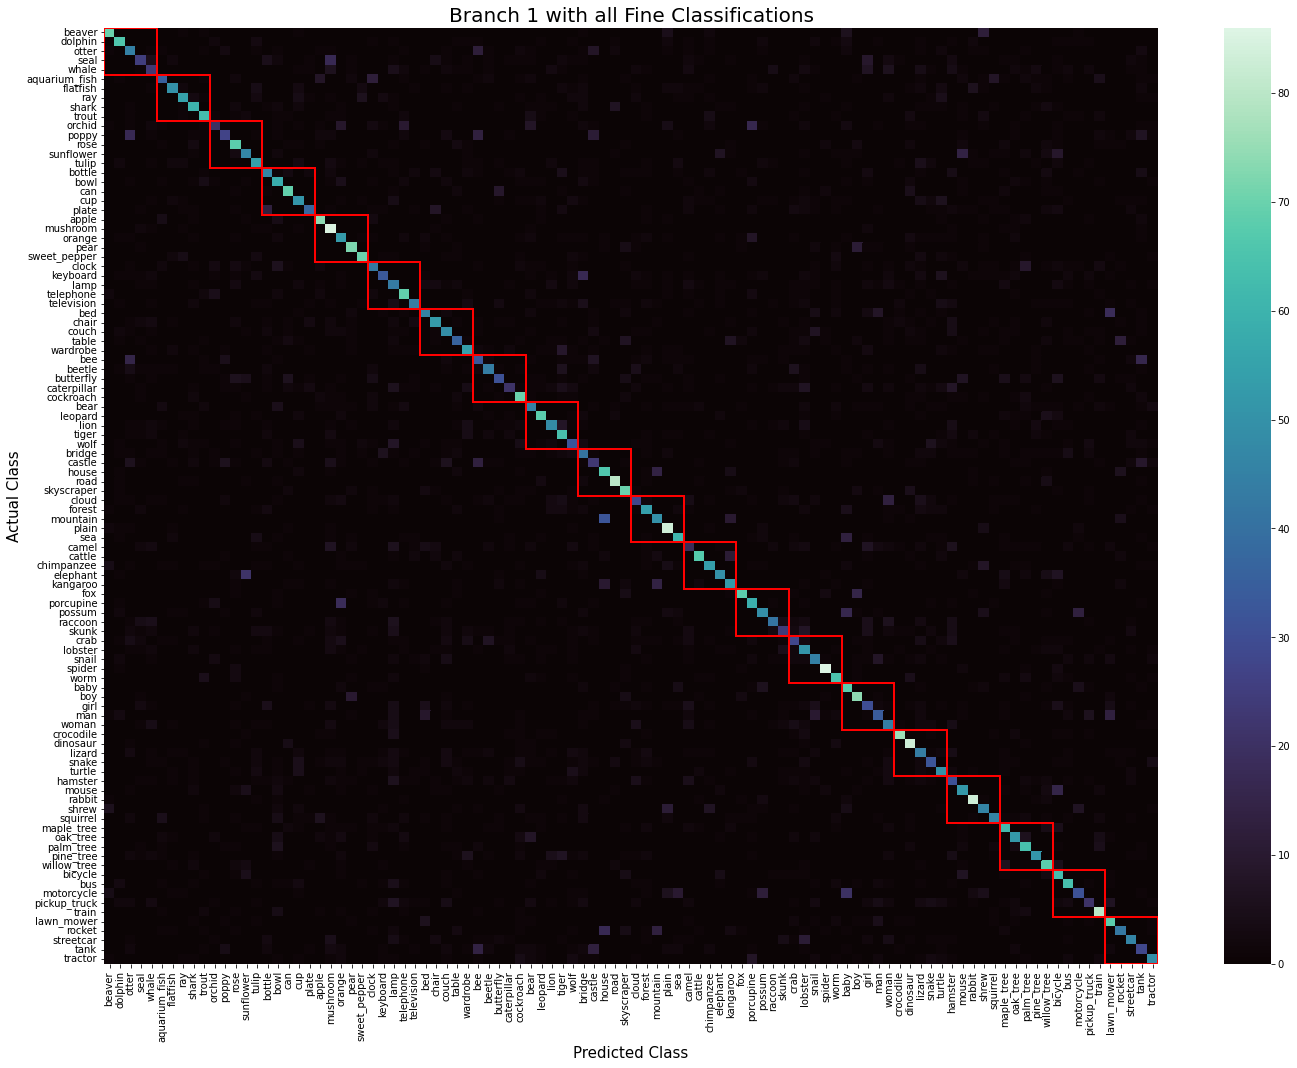

In [23]:
conf_matrix(1, [1e6, 0, 0])

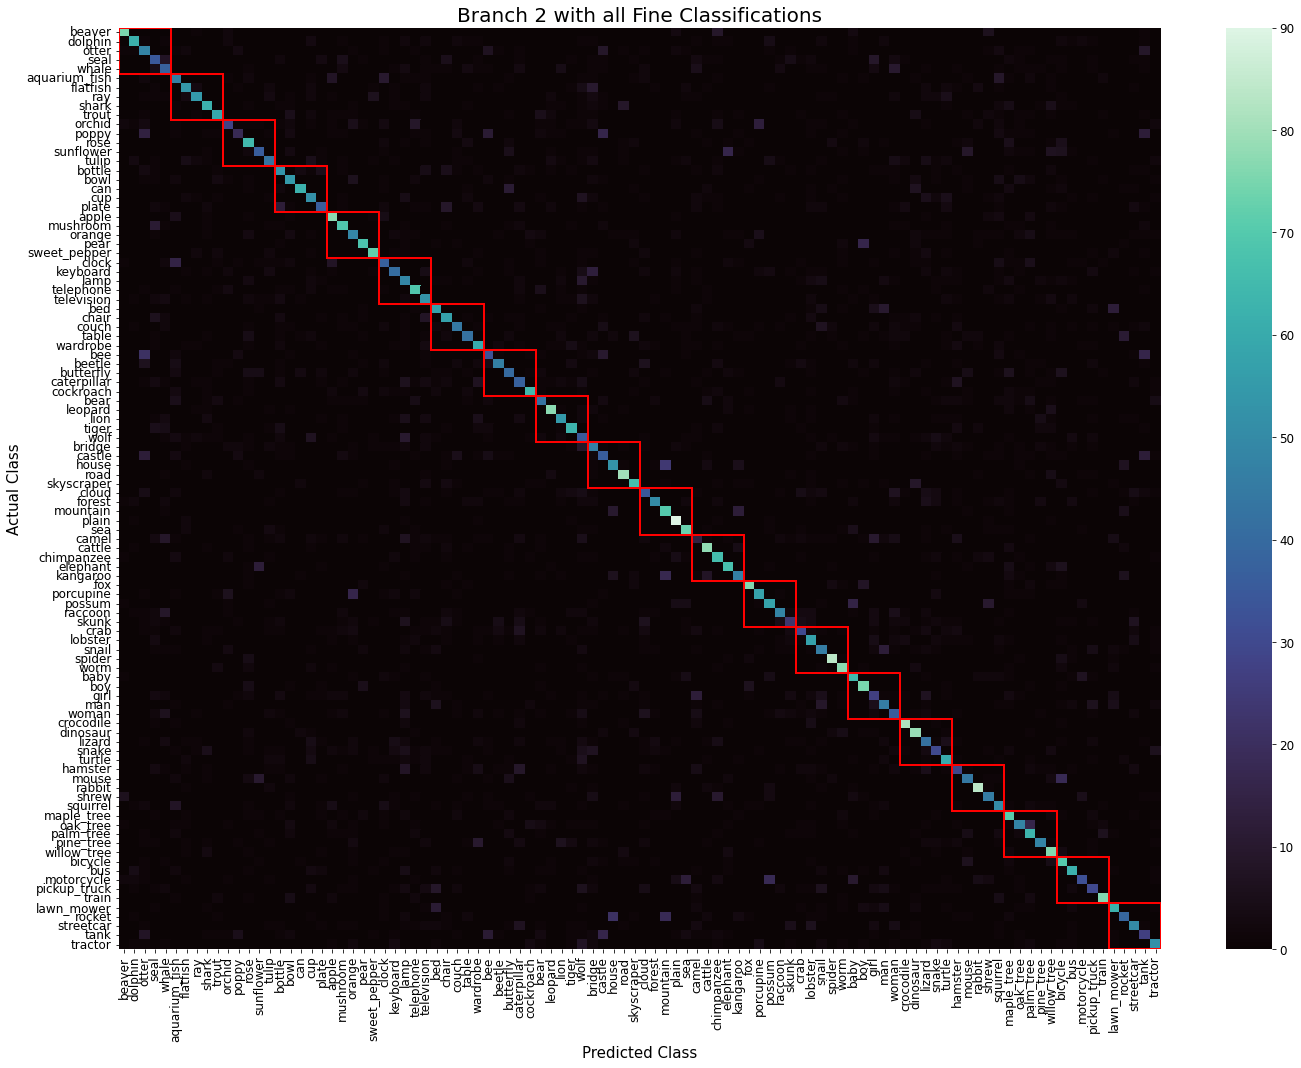

In [24]:
conf_matrix(2, [0, 1e6, 0])

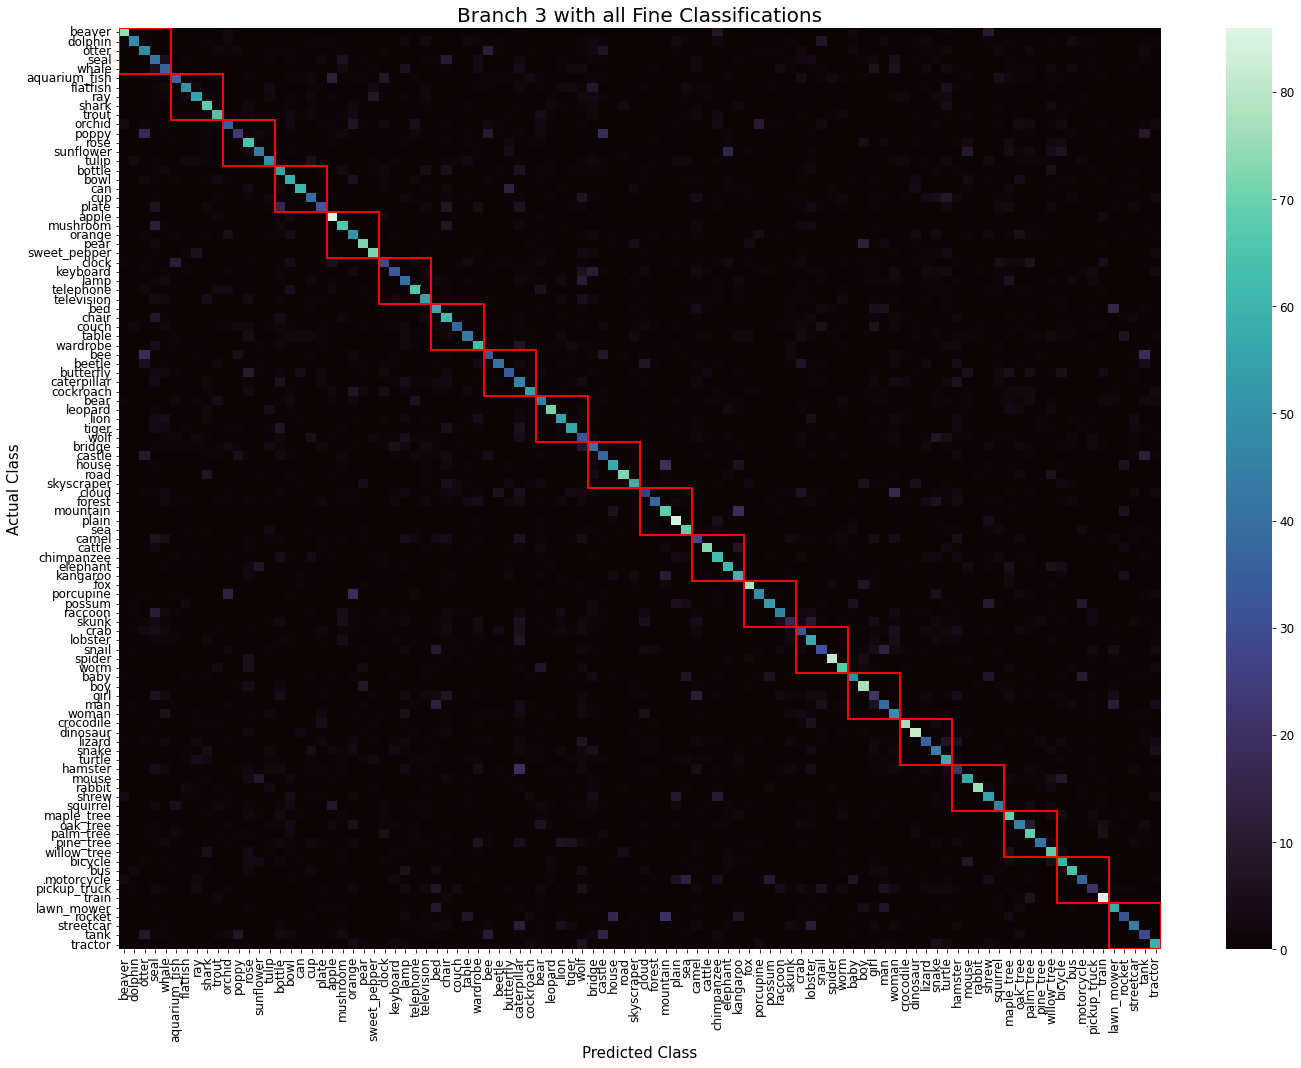

In [25]:
conf_matrix(3, [0, 0, 1e6])

## Check for a Relationship between the Exit and the Classification Entropy

In [26]:
# instance gran-hbn model
gran_hbn = SuperHBN_Testing().to(device)
gran_hbn.load_state_dict(torch.load('../results/models/Super-HBN.pth', map_location=device))
gran_hbn.eval()
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False, num_workers=0)

thresholds = [[1e6, -1e6], [-1e6, 1e6], [-1e-6, -1e-6]]

def get_entropies(threshold):
    fine_tolerances, coarse_entropies, fine_entropies = [], [], []
    for ft in np.arange(0.2, 0.8, 0.02):
        for image, label in test_loader:
            image, label = image.to(device), label.to(device)

            # get semantic classification entropy
            output, exit, fine_entropy, coarse_entropy, entropy_difference = gran_hbn(image, threshold=threshold, fine_tolerance=ft)
            fine_tolerances.append(ft)
            coarse_entropies.append(coarse_entropy.item())
            fine_entropies.append(fine_entropy.item())

            del output
            del exit
            del fine_entropy
            del coarse_entropy
            del entropy_difference
            
    return fine_tolerances, fine_entropies, coarse_entropies

fine_tolerances_1, fine_entropies_1, coarse_entropies_1 = get_entropies(thresholds[0])
fine_tolerances_2, fine_entropies_2, coarse_entropies_2 = get_entropies(thresholds[1])
fine_tolerances_3, fine_entropies_3, coarse_entropies_3 = get_entropies(thresholds[2])

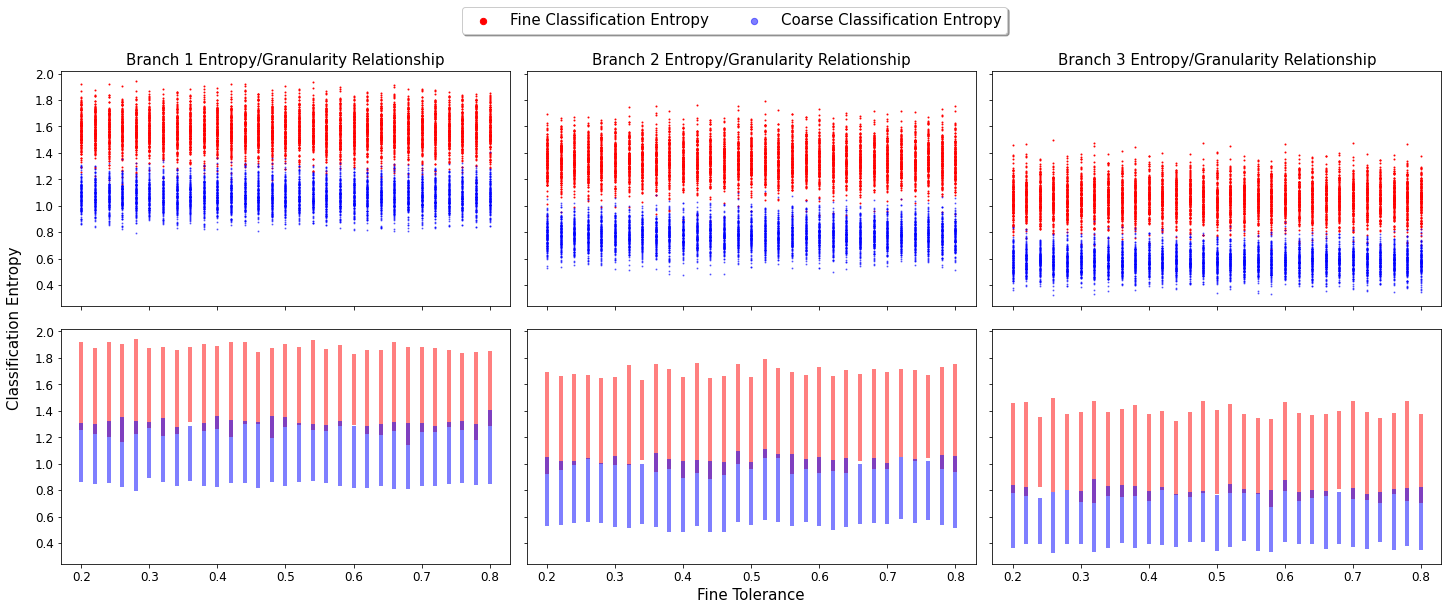

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assume you have three sets of data for each subplot
fine_data_sets = [fine_entropies_1, fine_entropies_2, fine_entropies_3]
coarse_data_sets = [coarse_entropies_1, coarse_entropies_2, coarse_entropies_3]
tolerance_values = [fine_tolerances_1, fine_tolerances_2, fine_tolerances_3]
titles = ['Branch 1 Entropy/Granularity Relationship', 'Branch 2 Entropy/Granularity Relationship', 'Branch 3 Entropy/Granularity Relationship']

# Create subplots with shared x-axis and y-axis
fig, axes = plt.subplots(2, 3, figsize=(20, 8), sharex='col', sharey='row', gridspec_kw={'height_ratios': [1, 1]})

# Loop through each subplot
for i, (fine, coarse, tolerances, title) in enumerate(zip(fine_data_sets, coarse_data_sets, tolerance_values, titles)):
    # Calculate the minimum and maximum y values for each unique x value
    unique_tolerances = np.unique(tolerances)
    min_fine_values = [np.min([y for xi, y in zip(tolerances, fine) if xi == ut]) for ut in unique_tolerances]
    max_fine_values = [np.max([y for xi, y in zip(tolerances, fine) if xi == ut]) for ut in unique_tolerances]
    
    min_coarse_values = [np.min([y for xi, y in zip(tolerances, coarse) if xi == ut]) for ut in unique_tolerances]
    max_coarse_values = [np.max([y for xi, y in zip(tolerances, coarse) if xi == ut]) for ut in unique_tolerances]

    axes[0, i].scatter(tolerances, fine, c='r', s=1.0, label='Fine Classification Entropy')
    axes[0, i].scatter(tolerances, coarse, c='b', s=1.0, label='Coarse Classification Entropy', alpha=0.5)
    
    # Plot the range of y values for each x value using vertical lines
    axes[1, i].vlines(unique_tolerances, min_fine_values, max_fine_values, colors='r', linewidth=4, alpha=0.5, label='Fine Range')
    axes[1, i].vlines(unique_tolerances, min_coarse_values, max_coarse_values, colors='b', linewidth=4, alpha=0.5, label='Coarse Range')
    
    axes[0, i].set_title(title, fontsize=15)
    
    handles, labels = axes[0, i].get_legend_handles_labels()

# Set a common xlabel for the bottom row
axes[1, 1].set_xlabel('Fine Tolerance', fontsize=15)
fig.text(-0.005, 0.5, 'Classification Entropy', va='center', rotation='vertical', fontsize=15)

# Adjust layout
# Create a common legend outside the subplots using handles and labels from the first plot
handles, labels = axes[0, 0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper center', fontsize=15, bbox_to_anchor=(0.5, 1.07), ncol=len(titles), fancybox=True, shadow=True)
# Set the marker size in the legend
legend.legendHandles[0]._sizes = [40]  # Set the size for the 'Fine Classification Entropy' dot
legend.legendHandles[1]._sizes = [40]  # Set the size for the 'Coarse Classification Entropy' dot

fig.tight_layout()
plt.show()